<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию" data-toc-modified-id="Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Откройте файл с данными и изучите общую информацию</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Шаг-3.-Ответьте-на-вопросы" data-toc-modified-id="Шаг-3.-Ответьте-на-вопросы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Ответьте на вопросы</a></span></li><li><span><a href="#Шаг-4.-Общий-вывод" data-toc-modified-id="Шаг-4.-Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

In [2]:
import pandas as pd
import seaborn
import warnings
import numpy as np
warnings.filterwarnings("ignore")

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [3]:
# data = pd.read_csv('/Users/maria/Documents/data.csv')
# #просмотр первых 10-ти строк датасета
# data.head(10)

In [4]:
try:
    data = pd.read_csv('/Users/maria/Documents/data.csv')
except:
    data = pd.read_csv('/datasets/data.csv')
    
#просмотр первых 10-ти строк датасета
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [5]:
#просмотр последних 10-ти строк датасета
data.tail(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


In [6]:
#просмотр общей информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Вывод**
Информация неоднородна, представлена как в нижнем так и в верхнем регистре, присутствуют отрицательные значения (графа days_employed), которые явно не могут быть релевантными, так как, например, невозможно работать -8437 дней. Непонятна метрика оценки. Например - days_employed = 340266.072047 - общий трудовой стаж в днях. В году 365 дней, если человек работал без выходных, то он отработал 340266/365 = (приблизительно) 931 год, при этом долгожитель сообщает в следующей графе, что ему 53 года. 
Помимо этого, вопросы вызывает столбец income_type - тип занятости (по описанию данных) - что означает тип занятости "компаньон"? В данном исследовании предполагается считать этого человека безработным, но имеющим доход за счет совместного проживания с кем-то.
В данных присутствуют пропущенные значения, необходимые к изучению.
Необходимо изучить явные дубликаты.
Столбец purpose также необходимо систематизировать, изучив неявные дубликаты.
Итого, проблемы файла (первичные, обнаруженные при просмотре первых 10-ти строк, последних 10-ти строк и общей информации о датасете):
1. Наличие отрицательных значений (days_employed)
2. Данные несоизмеримы с реальными (days_employed)
3. Разное количество знаков после запятой (total_income)
4. Использование как верхнего, так и нижнего регистра в строках (education)
5. Пропуски данных (days_employed, total_income)
6. Большое количество неявных дубликатов (purpose)
7. Избыточное количество столбцов, важно понять идентификатор столбца family_status_id, коррелирует ли он с family_status (family_status, family_status_id), то же самое касается education и education_id

Необходима верификация данных для проведения качественного исследования

## Шаг 2. Предобработка данных

### Обработка пропусков

In [7]:
#поиск пропущенных значений
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Количество пропущенных значений одинаково для days_employed и total_income. 
Предположение 1 - люди, которые не указали свой доход не работают и никогда не работали
Предположение 2 - ошибка в данных

In [8]:
#доля пропущенных значений в общем датасете
miss_share = 2174 / 21525 * 100
display('Доля пропущенных значений для столбцов days_employed и total_income (в процентах):', miss_share)

'Доля пропущенных значений для столбцов days_employed и total_income (в процентах):'

10.099883855981417

**Вывод**
Доля пропущенных значений составляет чуть более 10-ти% и может незначительно повредить выборке.


In [9]:
#визуализация процентного соотношения пропусков
display(pd.DataFrame(round((data.isna().mean()*100),2), columns=['NaNs, %']).style.format(
    '{:.2f}').background_gradient('coolwarm'))

,"NaNs, %"
children,0.00
days_employed,10.10
dob_years,0.00
education,0.00
education_id,0.00
family_status,0.00
family_status_id,0.00
gender,0.00
income_type,0.00
debt,0.00


### Замена типа данных

In [10]:
#замена пропусков в данных столбца total_income медианным значением

#median_total_income = data['total_income'].median()
#data['total_income'] = data['total_income'].fillna(median_total_income)

Замена пропусков медианным значением позволяет подставить в пустую ячейку корректное значение, которое не будет являться выбросом данных. Использование среднего значения при подобных манипуляциях с количественными данными может повредить выборку за счет выбросов.
В то же время, подставление медианного значения в банковской сфере не может являться на 100% правильным решением, поскольку может повысить шанс выдачи кредита лицу с отсутствующим доходом или доходом меньше медианного, что повлечет проблемы для банка. 

In [11]:
#подсчет количества уникальных записей (для подсчета в будущих итерациях)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Рассмотрим аномалии в каждом столбце датасета

In [12]:
#поиск аномалий в столбце - сhildren
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Уникальные значения - 0, 1, 2, 3, 4, 5 выглядят логично, в то время как -1 и 20 выглядят как нерелевантные значения.
Предположение 1: -1 - опечатка, нужно исправить на 1
Предположение 2: 20 - требуется проверка и соотнесение с другими данными клиента. Возможно, также опечатка и должно быть 2 либо значение теоретически может быть корректным. Необходим просмотр других данных клиента (возраст, семейное положение, пол и другие данные).

In [13]:
#замена значения -1 в столбце children на значение 1
вфефхэсршдвкутэъ = вфефхэсршдвкутэъюкуздфсу(-1б 1)

In [14]:
#просмотр строки клиента с значением 20 детей
data.loc[data['children'] == 20]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
606,20,-880.221113,21,среднее,1,женат / замужем,0,M,компаньон,0,145334.865002,покупка жилья
720,20,-855.595512,44,среднее,1,женат / замужем,0,F,компаньон,0,112998.738649,покупка недвижимости
1074,20,-3310.411598,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518.537004,получение образования
2510,20,-2714.161249,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474.835577,операции с коммерческой недвижимостью
2941,20,-2161.591519,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739.941398,на покупку автомобиля
...,...,...,...,...,...,...,...,...,...,...,...,...
21008,20,-1240.257910,40,среднее,1,женат / замужем,0,F,сотрудник,1,133524.010303,свой автомобиль
21325,20,-601.174883,37,среднее,1,женат / замужем,0,F,компаньон,0,102986.065978,профильное образование
21390,20,NaN,53,среднее,1,женат / замужем,0,M,компаньон,0,NaN,покупка жилой недвижимости
21404,20,-494.788448,52,среднее,1,женат / замужем,0,M,компаньон,0,156629.683642,операции со своей недвижимостью


76 человек утверждают, что у них 20 детей, причем как минимум одному из них 0 лет. 
На основе этих данных предполагаем, что имела место опечатка и целевое значение - 2 ребенка. Прежде чем менять, посмотрим разбивку по возрастам у людей с 20 детьми.

In [15]:
#Группировка по возрасту для людей с 20-тью детьми
data[data['children'] == 20].groupby('dob_years')['dob_years'].count()

dob_years
0     1
21    1
23    1
24    1
25    1
26    1
27    2
29    2
30    3
31    2
32    2
33    2
34    3
35    2
36    2
37    4
38    1
39    1
40    4
41    2
42    3
43    2
44    2
45    3
46    3
48    1
49    3
50    3
51    1
52    1
53    1
54    1
55    1
56    5
57    1
59    2
60    1
61    1
62    1
64    1
69    1
Name: dob_years, dtype: int64

Если у человека, которому 69 лет теоретически может оказаться 20 детей, то у человека возраста 0 лет 20 детей быть не может даже теоретически. Делаем вывод о том, что 20 детей это опечатка при внесении данных, соответственно необходимо заменить 20 детей на 2.

In [16]:
#замена значения 20 в столбце children на значение 2
data['children'] = data['children'].replace(20, 2)

In [17]:
#проверка значений в столбце children
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Теперь все значения выглядят реальными, столбец children готов к обработке

In [20]:
#поиск аномалий в столбце dob_years и сортировка данных по количеству повторений
data['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [21]:
#подсчитаем тех, чей возраст менее 18 лет
data[data['dob_years'] < 18]['dob_years'].count()

101

101 человек имеет возраст до 18-ти лет (0 лет). Предположительно, они некорректно указали свой возраст либо имела место ошибка в данных

In [22]:
#сортировка людей с возрастом 0 лет по семейному статусу.
data_years_family_0 = data.loc[data['dob_years']<18]
dob_years_grouped = data_years_family_0.groupby('family_status')['dob_years'].count()
dob_years_grouped

family_status
Не женат / не замужем    16
в разводе                10
вдовец / вдова            5
гражданский брак         21
женат / замужем          49
Name: dob_years, dtype: int64

В каждой категории присутствуют люди, которые внесены в базу с возрастом 0, подтверждается гипотеза об ошибке в данных. 

In [23]:
#сортировка людей с возрастом 0 лет по уровню дохода.
data_years_income_0 = data.loc[data['dob_years']<18]
income_type_dob_years_grouped = data_years_income_0.groupby('income_type')['dob_years'].count()
income_type_dob_years_grouped

income_type
госслужащий     6
компаньон      20
пенсионер      20
сотрудник      55
Name: dob_years, dtype: int64

In [24]:
#найдем медианные значения по каждой группе для заполнения пропусков
income_type_dob_years_grouped_total = data.groupby('income_type')['dob_years'].median()
income_type_dob_years_grouped_total

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

In [25]:
#заполним пропуски медианными значениями по каждому типу дохода
data.loc[(data['income_type'] == 'госслужащий') & (data['dob_years'] == 0), 'dob_years'] = 40
data.loc[(data['income_type'] == 'компаньон') & (data['dob_years'] == 0), 'dob_years'] = 39
data.loc[(data['income_type'] == 'пенсионер') & (data['dob_years'] == 0), 'dob_years'] = 60
data.loc[(data['income_type'] == 'сотрудник') & (data['dob_years'] == 0), 'dob_years'] = 39

Данные по людям с возрастом 0 заменены на медианные значения по типу дохода указанной группы

In [26]:
#поиск аномалий в столбце days_employed
data['days_employed'].unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

Метод unique ничего не дал, поскольку, в отличие от количества детей (предыдущий столбец), все данные в этом столбце неоднородны. В первую очередь, необходимо привести все данные к положительным цифрам. Во вторых, необходимо привести все данные к целому числу, так как обработка разного количества знаков после запятой существенно усложнит работу проекта, а разница менее 1 рабочего дня не окажет какого-либо существенного эффекта

In [27]:
data['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

Метод describe() показывает, что есть значительный разброс данных, который нельзя объяснить различием трудового стажа. Например, максимальное значение составляет 140827 дней, проведенных на работе, что равняется практически 386 годам. Другая проблема - отрицательные числа, нельзя провести не работе даже -1 день, не говоря уже о -18388.9 дней. Сначала необходимо привести данные к положительным числам.

In [28]:
#приведение данных к положительным числам и проверка данных
data['days_employed']=data['days_employed'].abs()
data['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

В стобце days_employed всё еще присутствуют пропущенные значения. Можно заполнить их значением 0 либо значением максимально возможного отработанного времени для данного респондента. При расчете, что в столбце total_income значения были заполнены медианным значением, логично также установить в пустые значения столбца days_employed медианное значение отработанного количество дней для каждой группы, которое не будет нарушать выборку.

In [29]:
#проверка количества пропущенных записей
data['days_employed'].isnull().sum()

2174

In [30]:
# сформируем сводную табличку с группировкой по типу занятости и измерением медианного дохода
group_income = data.groupby('income_type')['days_employed'].median()
# заполним пропуски на медианный доход, основываясь на типе занятости
for i in group_income.index:
    data.loc[(data['income_type'] == i) & (data['days_employed'].isnull()), 'days_employed'] = group_income[i]
#проверка количества пропущенных записей
data['days_employed'].isnull().sum()

0

Пропуски в данных заменены на медианные значения по уровням дохода для каждой группы

In [31]:
#просмотр аномалий и уникальных значений family_status
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Столбец выглядит аккуратно. Единственная аномалия, которая, впрочем, не мешает исследованию - первая большая буква 'Не женат ___'.

In [32]:
#просмотр аномалий и уникальных значений gender
data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [33]:
#поиск количества значений XNA
data[data['gender'] == 'XNA'].count()

children            1
days_employed       1
dob_years           1
education           1
education_id        1
family_status       1
family_status_id    1
gender              1
income_type         1
debt                1
total_income        1
purpose             1
dtype: int64

Выявлено одно значение XNA в данных. Исключение данной строки из выборки не нанесет вреда остальным данным. 

In [34]:
#исключение строки со значением gender = XNA из выборки
data = data[data['gender'] != 'XNA']

In [35]:
#проверка аномалий и уникальных значений столбца Gender
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [36]:
#просмотр аномалий и уникальных значений income_type
data['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

В столбце income_type аномалий не выявлено

In [37]:
#просмотр аномалий и уникальных значений debt
data['debt'].unique()

array([0, 1])

Долг или есть или нет, аномалий не выявлено

Цифры выглядят логично и адекватно, но просмотр затруднен, предположительно из-за большого количества знаков после запятой. Приведем числа к целым. 

**Вывод** В данном разделе рассмотрены аномалии данных, данные обработаны и заменены в случае необходимости.

In [38]:
#проверка замены пропусков в данных
data.isnull().sum()

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Данные столбца total_income будут обработаны в рамках последующих действий

### Обработка дубликатов

In [39]:
#проверка на дубликаты
data.duplicated().sum()

54

Обнаружено 54 дубликата, предоположительно это разные заявки для одного клиента или ошибка датасета

In [40]:
#удаление явных дубликатов и проверка на их отсутствие по итогу удаления
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

In [41]:
#поиск аномалий и уникальных значений в столбце education
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Данные в этом столбце находятся как в верхнем, так и в нижнем регистре. Необходимо привести все данные к общей форме и взглянуть на уникальные значения снова.

In [42]:
#приведение всех букв в нижний регистр
data['education'] = data['education'].str.lower()
#просмотр уникальных значений
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [43]:
#повторная проверка на полные дубликаты по результатам обработки
data.duplicated().sum()

17

In [44]:
#удаление полных дубликатов и проверка на их отсутствие по итогу удаления
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

**Вывод** Явные и неявные дубликаты в датасете обработаны.

### Лемматизация

Теперь столбец выглядит аккуратно. По данным выше мы знаем, что пропущенных значений в этом столбце нет, можно считать его актуальным.

Для столбца total_income не имеет смысла использовать метод unique(), так как значения уникальны для каждого респондента. 

In [45]:
#просмотр аномалий и уникальных значений total_income
data['total_income'].describe()

count    1.935000e+04
mean     1.674204e+05
std      1.029739e+05
min      2.066726e+04
25%      1.030407e+05
50%      1.450117e+05
75%      2.034244e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [46]:
#проверка количества пустых значений в столбце total_income
data['total_income'].isnull().sum()

2103

Пропущенные значения есть в двух столбцах: "общий трудовой стаж в днях" ('days employed') и "ежемесячный доход" ('total_income'). Доля пропущенных значений в обоих столбцах составляет 10%. То, что количество пропусков в обоих столбцах совпадает, позволяет предположить, что 10% потенциальных заемщиков не являются наемными сотрудниками на постоянной ставке, поэтому у них отсутствует информация о стаже и доходе. Вероятно, это фрилансеры либо владельцы бизнеса, и их доход отличается от месяца к месяцу.
Заполнить пропуски в столбце с доходом лучше всего медианным значением, таким образом мы предположим, что потенциальные заемщики, не указавшие свой доход, имеют среднестатистический заработок.

In [47]:
#создание переменной по медиане зарплаты
med_salary = data.groupby('income_type')['total_income'].transform('median')

#заменяем пропуски медианой по каждой группе
data['total_income'] = data['total_income'].fillna(med_salary)
#проверка наличия пропусков в столбце total_income
data['total_income'].isnull().sum()

0

In [48]:
#приведение чисел к целым
data['days_employed']= data['days_employed'].fillna(0)
data['total_income'] = data['total_income'].astype('int')
data['days_employed'] = data['days_employed'].astype('int')
#просмотр получившегося результа
data.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


**Вывод** Данные приведены в состояние обработки, устранена проблема разных регистров, числа приведены к целым для удобства работы

### Категоризация данных

In [49]:
#поиск аномалий и неявных дубликатов в столбце purpose
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

В столбце purpose присутствует много формулировок, которые пересекаются по значеию. Необходимо создание нового столбца purpose_category, 
в который войдут следующие категории:
операции с автомобилем,
операции с недвижимостью,
проведение свадьбы,
получение образования.

In [50]:
def purpose_category(purpose):
    if 'свадьб' in purpose:
        return 'проведение свадьбы'
    if 'авто' in purpose:
        return 'операции с автомобилем'
    if 'недвиж' in purpose or 'жил' in purpose:
        return 'операции с недвижимостью'
    if 'образован' in purpose:
        return 'получение образования'
data['purpose_category'] = data['purpose'].apply(purpose_category)
display(data.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,получение образования
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,операции с недвижимостью
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операции с недвижимостью
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,получение образования
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,операции с недвижимостью


In [51]:
#создание отдельного датафрейм education_dataframe
education_dataframe = data[['education', 'education_id']]
#удаление столбца education из датасета data
del data['education']
data.head(10)

,children,days_employed,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью
1,1,4024,36,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем
2,0,5623,33,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью
3,3,4124,32,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,получение образования
4,0,340266,53,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы
5,0,926,27,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,операции с недвижимостью
6,0,2879,43,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,операции с недвижимостью
7,0,152,50,1,женат / замужем,0,M,сотрудник,0,135823,образование,получение образования
8,2,6929,35,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,проведение свадьбы
9,0,2188,41,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,операции с недвижимостью


Помимо столбца family_status, в датасете также присутствует столбец family_status_id, где каждому уникальному значению из family_status соответствует уникальное значение family_status_id. Использование обоих столбцов в основном датасете затрудняет просмотр данных. 
Необходимо вынести эти два столбца в отдельный датафрейм, оставив в основном только family_status_id.

In [52]:
family_status_dataframe = data[['family_status', 'family_status_id']]
family_status_dataframe.head(10)
del data['family_status']
data.head(10)


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,получение образования
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,операции с недвижимостью
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,операции с недвижимостью
7,0,152,50,1,0,M,сотрудник,0,135823,образование,получение образования
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,операции с недвижимостью


Помимо столбца education, в датасете также присутствует столбец education_id, где каждому уникальному значению из education соответствует уникальное значение education_id. Использование обоих столбцов в основном датасете затрудняет просмотр данных. 
Необходимо вынести эти два столбца в отдельный датафрейм, оставив в основном только education_id.

In [53]:
#проверка на полные дубликаты в созданном датафрейме family_status_dataframe
family_status_dataframe.duplicated().sum()

21448

In [54]:
#проверка на полные дубликаты в созданном датафрейме education_dataframe
education_dataframe.duplicated().sum()

21448

In [55]:
#удаление полных дубликатов для формирования словаря и проверка на их отсутствие по итогу удаления
family_status_dataframe = family_status_dataframe.drop_duplicates().reset_index(drop=True)
family_status_dataframe.duplicated().sum()

education_dataframe = education_dataframe.drop_duplicates().reset_index(drop=True)
education_dataframe.duplicated().sum()

0

In [56]:
# создание столбца total_income_category
def total_income_category(total_income):
    if total_income <= 30000:
        return 'E'
    if total_income >=30001 and total_income <= 50000:
        return 'D'
    if total_income >=50001 and total_income <= 200000:
        return 'C'
    if total_income >=200001 and total_income <= 1000000:
        return 'B'
    return 'A'
data['total_income_category'] = data['total_income'].apply(total_income_category)
total_income_dataframe=[['total_income', 'total_income_category']]
display(data.head(10))


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,операции с недвижимостью,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,операции с автомобилем,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,операции с недвижимостью,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,получение образования,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,проведение свадьбы,C
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья,операции с недвижимостью,B
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем,операции с недвижимостью,B
7,0,152,50,1,0,M,сотрудник,0,135823,образование,получение образования,C
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,проведение свадьбы,C
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,операции с недвижимостью,C


Лучше объединить purpose и purpose_category в отдельный датафрейм и удалить purpose и датафрейма data.

In [57]:
#создание датафрейма purpose_categories_dataframe
purpose_categories_dataframe=[['purpose', 'purpose_category']]
# удаление столбца purpose из основного датасета
del data['purpose']
data.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose_category,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,операции с недвижимостью,B
1,1,4024,36,1,0,F,сотрудник,0,112080,операции с автомобилем,C
2,0,5623,33,1,0,M,сотрудник,0,145885,операции с недвижимостью,C
3,3,4124,32,1,0,M,сотрудник,0,267628,получение образования,B
4,0,340266,53,1,1,F,пенсионер,0,158616,проведение свадьбы,C
5,0,926,27,0,1,M,компаньон,0,255763,операции с недвижимостью,B
6,0,2879,43,0,0,F,компаньон,0,240525,операции с недвижимостью,B
7,0,152,50,1,0,M,сотрудник,0,135823,получение образования,C
8,2,6929,35,0,1,F,сотрудник,0,95856,проведение свадьбы,C
9,0,2188,41,1,0,M,сотрудник,0,144425,операции с недвижимостью,C


**Вывод** Необходимые дополнительные датафреймы созданы, данные перенесены для удобства чтения и обработки датасета.

**Вывод раздела**
Данные приведены к наиболее возможной однородности, отрицательные значения изучены и превращены в положительные, данные соизмеримы с реальными, количество знаков после запятой приведено к общей норме, регистр приведен к нижнему, одинаковому для всех столбцов, пропущенные данные удалены либо заменены медианными, неявные дубликаты изучены и приведены к общим формам, лишние столбцы удалены
Данные готовы к анализу.


## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [62]:

children_grouped = data.groupby('children').count()
children_debt_pivot = data.pivot_table(index = ['children'], values = 'debt', aggfunc='sum')
children_debt_pivot['total'] = children_grouped['days_employed']
children_debt_pivot['ratio'] = children_debt_pivot['debt']/children_debt_pivot['total']*100
children_debt_pivot['ratio'] = children_debt_pivot['ratio'].round(3)
children_debt_pivot.rename(columns={'debt':'Всего должников', 'total':'Всего кредитополучателей', 'ratio':'Доля должников в %'})

,Всего должников,Всего кредитополучателей,Доля должников в %
children,,,
0,1063,14090,7.544
1,445,4855,9.166
2,202,2128,9.492
3,27,330,8.182
4,4,41,9.756
5,0,9,0.000


По данным сводной таблицы видно (столбец ratio), что 8-10 процентов людей из каждой группы имеющих детей не закрывает кредит в срок.
для наглядности стоит также составить столбчатую диаграмму, на которой лучше будет визуально виден процент.


<AxesSubplot:xlabel='children', ylabel='debt'>

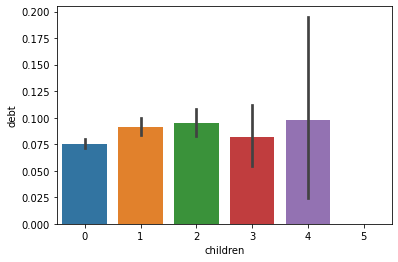

In [58]:
seaborn.barplot(data['children'], data['debt'])

**Вывод**
На диаграмме видно, что процент людей, не возвращающих кредиты практически не отличается у людей с разным количеством детей. Необходимо дополнительно ответить, что выборка по респондентам с 5-тью детьми нерепрезентативна, так как не включает ни одного неотдавшего кредит респондента, в то время как количество таких респондентов значительно меньше чем у других категорий. В то же время, можно сказать, что заемщики, у которых нет детей, а также те, у кого 3 ребенка более склонны возвращать кредит, чем остальные категории.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [59]:
#для удобства выведем датафрейм, показывающий семейный статус и его id.
family_status_dataframe.value_counts()
family_status_grouped = data.groupby('family_status_id').count()

In [60]:
family_status_debt_pivot = data.pivot_table(index ='family_status_id', values = 'debt', aggfunc='sum')
family_status_debt_pivot['total'] = family_status_grouped['days_employed']
family_status_debt_pivot['ratio'] = family_status_debt_pivot['debt']/family_status_debt_pivot['total']*100
family_status_debt_pivot['ratio'] = family_status_debt_pivot['ratio'].round(3)
family_status_debt_pivot = family_status_debt_pivot.merge(family_status_dataframe, on='family_status_id')
family_status_debt_pivot.rename(columns={'debt':'Всего должников', 'total':'Всего кредитополучателей', 'ratio':'Доля должников в %'})


,family_status_id,Всего должников,Всего кредитополучателей,Доля должников в %,family_status
0,0,931,12339,7.545,женат / замужем
1,1,388,4150,9.349,гражданский брак
2,2,63,959,6.569,вдовец / вдова
3,3,85,1195,7.113,в разводе
4,4,274,2810,9.751,Не женат / не замужем


<AxesSubplot:xlabel='family_status_id', ylabel='debt'>

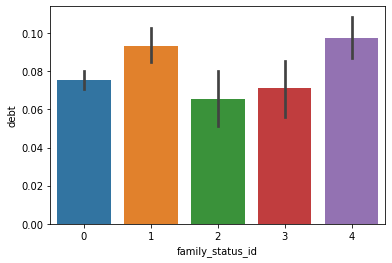

In [61]:
seaborn.barplot(data['family_status_id'], data['debt'])

**Вывод** Согласно данным сводной таблицы и диаграммы, люди в разводе и вдовцы с наибольшей вероятностью вернут кредит. Меньше всего процент возврата кредита у неженатых/незамужних людей.

**Вывод**

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [62]:
#необходимо посмотреть зависимость между уровнем дохода и возвратом кредита в срок для каждого уровня дохода. 
#прежде всего, для удобства, сделаем словарь с категориями уровней дохода и их описанием.
total_income_dict = {
    'total_income_category': ['E','D','C','B','A'],
    'grouped_total_income': ['менее 30000', 'от 30000 до 50000', 'от 50000 до 200000', 'от 200000 до 1000000','более 1000000']
    }


total_income_dataframe = pd.DataFrame(total_income_dict)

In [63]:
total_income_grouped = data.groupby('total_income_category').count()
total_income_debt_pivot = data.pivot_table(index = ['total_income_category'], values = 'debt', aggfunc='sum')
total_income_debt_pivot['total'] = total_income_grouped['days_employed']
total_income_debt_pivot['ratio'] = total_income_debt_pivot['debt']/total_income_debt_pivot['total']*100
total_income_debt_pivot['ratio'] = total_income_debt_pivot['ratio'].round(3)
total_income_debt_pivot = total_income_debt_pivot.merge(total_income_dataframe, on='total_income_category')
total_income_debt_pivot.rename(columns={'debt':'Всего должников', 'total':'Всего кредитополучателей', 'ratio':'Доля должников в %'})

,total_income_category,Всего должников,Всего кредитополучателей,Доля должников в %,grouped_total_income
0,A,2,25,8.000,более 1000000
1,B,356,5041,7.062,от 200000 до 1000000
2,C,1360,16015,8.492,от 50000 до 200000
3,D,21,350,6.000,от 30000 до 50000
4,E,2,22,9.091,менее 30000


На основании таблицы можно сделать вывод, что выборку по категориям (A (Сверхвысокий уровень дохода) и E (Низкий уровень дохода)) нельзя назвать репрезентативной, в обеих категориях присутствует менее 1 процента общей выборки.

**Вывод** Выборка по группам с низким и сверхвысоким уровнем дохода нерепрезентативна, так что не может быть оценена качественно. В то же время, можно сделать вывод, что группы со средним доходом (В) и очень высоким доходом (И) возвращают кредит охотнее всего.

- Как разные цели кредита влияют на его возврат в срок?

In [64]:
purpose_category_debt_pivot = data.pivot_table(index=['purpose_category'], columns=['debt'], values='education_id', aggfunc='count')
purpose_category_debt_pivot['ratio'] = purpose_category_debt_pivot[1] / purpose_category_debt_pivot[0] * 100
purpose_category_debt_pivot 


purpose_category_grouped = data.groupby('purpose_category').count()
purpose_category_debt_pivot = data.pivot_table(index = ['purpose_category'], values = 'debt', aggfunc='sum')
purpose_category_debt_pivot['total'] = purpose_category_grouped['days_employed']
purpose_category_debt_pivot['ratio'] = purpose_category_debt_pivot['debt']/purpose_category_debt_pivot['total']*100
purpose_category_debt_pivot['ratio'] = purpose_category_debt_pivot['ratio'].round(3)
purpose_category_debt_pivot.rename(columns={'debt':'Всего должников', 'total':'Всего кредитополучателей', 'ratio':'Доля должников в %'})

,Всего должников,Всего кредитополучателей,Доля должников в %
purpose_category,,,
операции с автомобилем,403,4306,9.359
операции с недвижимостью,782,10810,7.234
получение образования,370,4013,9.220
проведение свадьбы,186,2324,8.003


Все категории выглядят репрезентативно, первый вывод - при цели кредита - операции с автомобилем или получение образования - люди реже возвращают кредит. Для удобства может быть создана столбчатая диаграмма.


<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

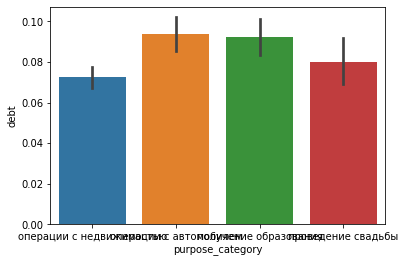

In [65]:
seaborn.barplot(data['purpose_category'], data['debt'])

**Вывод** Столбчатая диаграмма и сводная таблица показывают, что есть две выбивающиеся категории, которые возвращают свои кредиты реже. Эти категории берут кредиты с целью: "операции с автомобилем" и "получение образования".


## Шаг 4. Общий вывод

На основании полученных данных и проведенного анализа мной было проведено исследование, основные выводы которого можно сформировать следующим образом: 1. Процент людей, не возвращающих кредиты практически не отличается у людей с разным количеством детей. В то же время, можно сказать, что заемщики, у которых нет детей, а также те, у кого 3 ребенка более склонны возвращать кредит, чем остальные категории. 2. Люди в разводе и вдовцы с наибольшей вероятностью вернут кредит. Меньше всего процент возврата кредита у неженатых/незамужних людей. 3. Группы со средним доходом (В) и очень высоким доходом (И) возвращают кредит охотнее всего. 4. Люди, которые берут кредит на свадьбу или на операции с недвижимостью возвращают кредит охотнее всего.
